In [2]:
from data_mannn import * 
from tabulate import tabulate 
import sys 
import numpy as np 
import googleapiclient.discovery
import webbrowser
import matplotlib.pyplot as plt

In [3]:
#  Connect to SQLite database
conn = sql.connect("7773mera25.db") 

# List tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()

# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
Channels
Playlists
Vids
Relations


In [4]:
mera25_vids = fech_all(conn,"Vids")
# num_nan_values = mera25_vids.isnull().sum()
# print(num_nan_values) 
# mera25_vids = mera25_vids.dropna(axis=0) 
mera25_dates = mera25_vids["publish_date"].sort_values
print(mera25_vids.columns)

Index(['video_id', 'title', 'author', 'views', 'length', 'likes', 'dislikes',
       'publish_date', 'link', 'playlist_id'],
      dtype='object')


In [5]:
print(tabulate(mera25_vids.tail(), headers='keys', tablefmt='pretty'))

+------+----------+-------------------------------------------+--------+-------+--------+-------+---------------+---------------------+---------------------------------------------+-------------+
|      | video_id |                   title                   | author | views | length | likes |   dislikes    |    publish_date     |                    link                     | playlist_id |
+------+----------+-------------------------------------------+--------+-------+--------+-------+---------------+---------------------+---------------------------------------------+-------------+
| 7768 |   7769   |  Κρίτων Αρσένης – ΕΡΑ Χανίων  23/12/2022  | ΜέΡΑ25 |  359  |  1873  |  23   | Not available | 2022-12-29 00:00:00 | https://www.youtube.com/watch?v=zznWlyqjvK0 |             |
| 7769 |   7770   | Κρίτων Αρσένης – ΕΡΤ Καλαμάτας 22/12/2022 | ΜέΡΑ25 |  341  |  1521  |  28   | Not available | 2022-12-28 00:00:00 | https://www.youtube.com/watch?v=EAc938nynIw |             |
| 7770 |   7771   | 

In [6]:
print(mera25_vids.dtypes) 

video_id         int64
title           object
author          object
views            int64
length           int64
likes            int64
dislikes        object
publish_date    object
link            object
playlist_id     object
dtype: object


In [7]:
y = mera25_vids.likes 
mer_features = ['views', 'length','likes']
X = mera25_vids[mer_features] 
X.describe() 

,views,length,likes
count,7773.000000,7773.000000,7773.00000
mean,7273.882799,778.306574,173.83507
std,26888.636957,1080.912890,333.13366
min,1.000000,6.000000,0.00000
25%,418.000000,194.000000,21.00000
50%,1245.000000,497.000000,57.00000
75%,5664.000000,927.000000,198.00000
max,767083.000000,9714.000000,7279.00000


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=0)
print(X.shape, y.shape)

(7773, 3) (7773,)


In [9]:
mera25_model = DecisionTreeRegressor(random_state=1)
mera25_model.fit(X_train,y_train) 

val_likes = mera25_model.predict(X_val) 
print(f"mean abs error = {mean_absolute_error(y_val, val_likes)}_(likes)")

mean abs error = 1.3276748971193415_(likes)


In [10]:
def get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val): # get mean absolute errors
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val) 
    return mae

In [11]:
for max_leaf_nodes in [5,50,500,5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  58
Max leaf nodes: 50  		 Mean Absolute Error:  5
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [12]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
like_preds = forest_model.predict(X_val)
print(mean_absolute_error(y_val, like_preds)) 
# Trees mabey not the best model for this data 

1.5910493827160497


In [13]:
import pandas as pd

mera25_vids = pd.DataFrame(mera25_vids) 
mera25_vids.columns
mera25_vids.loc[ (mera25_vids.video_id == 1) | (mera25_vids.video_id == 11)] 
print(mera25_vids.loc[mera25_vids.index==11])

    video_id                                              title  author  \
11        12  Η εναρκτήρια ομιλία του Γραμματέα του ΜέΡΑ25 Γ...  ΜέΡΑ25   

    views  length  likes       dislikes         publish_date  \
11   7119    1958    211  Not available  2023-12-10 00:00:00   

                                           link playlist_id  
11  https://www.youtube.com/watch?v=s5oevp42VQc        None  


In [14]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
print("Ploting Setup Complete")

Ploting Setup Complete


In [15]:
# Create a DataFrame with only the selected features
interesting_features = ["length", "likes","views"]  
df_selected = mera25_vids[interesting_features]  

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the selected features
df_standardized = pd.DataFrame(scaler.fit_transform(df_selected), columns=interesting_features)
df_standardized.tail() 
# Concatenate the standardized features back to the original DataFrame
# mera25_vids = pd.concat([mera25_vids, df_standardized], axis=1)

,length,likes,views
7768,1.012814,-0.452806,-0.257184
7769,0.687143,-0.437796,-0.257853
7770,-0.163119,-0.458810,-0.259564
7771,-0.169596,-0.458810,-0.261238
7772,-0.496193,-0.371752,-0.242381


<Axes: >

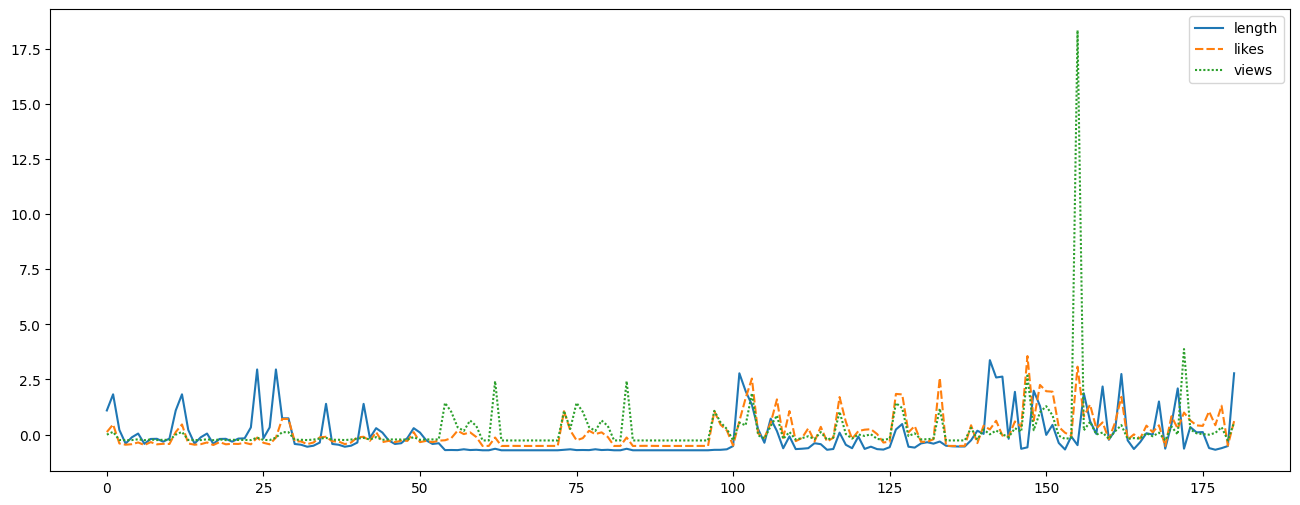

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df_standardized.loc[:180])

##### I need to know what was the most viewed video of any political party in the history of Greece's techno political era.

In [17]:
subset = mera25_vids.loc[:, ["views","link"]]
subset 
most_viewd  = mera25_vids.views
most_viewd 
# print(f"And the mosto viewd video is :\n{}")

0        7119
1       10488
2         632
3         458
4         495
        ...  
7768      359
7769      341
7770      295
7771      250
7772      757
Name: views, Length: 7773, dtype: int64